In [1]:
import os
user_directory = os.path.join(os.path.expanduser('~'), '')
os.chdir(user_directory)


In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import pandas as pd
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '339826de-d6b4-433e-82da-c3abed9a2537',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [3]:
type(data)

# data

dict

In [4]:

#This allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')


In [6]:



def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'./Downloads/API.csv'):
        df.to_csv(r'./Downloads/API.csv', header='column_names')
    else:
        df.to_csv(r'./Downloads/API.csv', mode='a', header=False)
        



In [7]:
import os 
from time import time
from time import sleep


for i in range(5):
    api_runner()
    print('API Runner completed')
    sleep(10) #sleep for 10 sec
# exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [10]:
df4 = df3.stack()

In [11]:
df5 = df4.to_frame(name='values')

In [12]:
df5.count()

values    90
dtype: int64

In [13]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
# df6

          name percent_change   values
0      Bitcoin             1h  0.72408
1     Ethereum             1h  0.47610
2  Tether USDt             1h -0.00312
3          BNB             1h  0.32006
4       Solana             1h  0.32562


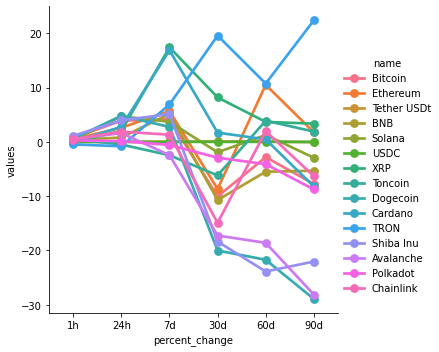

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to convert it from wide format to long format
melted_df = df.melt(id_vars=['name'], value_vars=[
    'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
    'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 
    'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'
], var_name='percent_change', value_name='values')

# Replace the column names to make them more readable
melted_df['percent_change'] = melted_df['percent_change'].replace({
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
})

# Check the resulting DataFrame
print(melted_df.head())

# Ensure the DataFrame is not empty and contains the required columns
if not melted_df.empty and 'percent_change' in melted_df.columns and 'values' in melted_df.columns and 'name' in melted_df.columns:
    sns.catplot(x='percent_change', y='values', hue='name', data=melted_df, kind='point')
    plt.show()
else:
    print("DataFrame is empty or missing required columns.")